# Classification Modeling: 
# County Overdose Rates and Information Access/Education
This is an assignment and a fictional case study by Alex Shropshire and Mia Iseman. U.S. Health and Human Services is not actually involved in any way. We do work with actual publicly available data.  
<a href="https://github.com/MIAISEMAN/overdose_classification"> Repository URL </a>   
<a href="https://github.com/MIAISEMAN/overdose_classification/blob/master/County%20Overdose%20Rates%20and%20Information%20Access_Education%20-%20Mia%20Iseman%20%26%20Alex%20Shropshire.pdf"> Presentation URL </a>

# Goal: Identify which U.S. counties are at risk of having a very high overdose fatality rate based on factors related to education and internet connectivity. 

# Process
1. Understand the business needs.
2. Understand the data. 
3. Prepare the data for analysis and modeling.
4. Model
5. Evaluate Results
6. Deploy

# Business Understanding

The U.S. Department of Health and Human Services has a number of partnerships with businesses and other governmental agencies to address public health concerns. Since we are in the middle of an opioid epidemic, it is necessary to discover whether there is an opportunity to form a partnership that prevents overdose fatalities. 

Before they can prevent overdoses, they need to do their due diligence to discover the deep underlying factors behind an overdose fatality. As part of this research, we have been tasked with investigating the relationship between overdose fatality rates at the county level based on county education and internet connectivity data. 

We will deliver a model that predicts whether a county will have a high overdose rate or not, so that more attention can be paid to those counties that are at risk of having the highest overdose rates in the country. This information will be combined with several other investigations and efforts in order to determine the best course of action in overdose prevention programming. 

# Data Understanding 

Our research and models do not imply a casual relationship (in either direction). High or low fatal overdose rate is our target feature.  Education/internet connectivity may <i>predict</i> our target, but they don't <i>cause</i> our target. This is another reason that this model and research should be taken with regard to several other datasets and models in order to understand the best way to predict AND prevent overdoses.

We constructed our target from the <a href="https://wonder.cdc.gov/"> Center for Disease Control's Wonder</a>, a database querying tool. 

Facts about our target variable, the Crude Death Rate: 
* Deaths from 2013-2017 
* Grouped by U.S. County for U.S. States
* Drug and Alcohol-related <i>fatalities</i> 
* Per 100,000 people 
* Some counties had suppressed or unreliable data. 

We construct our features from the U.S. Census American Community Survey <a href="https://www.census.gov/programs-surveys/acs/about.html">5-year 2013-2017 survey</a>. 


# Data Preparation

## Retrieve and prep the Census data (features)
We will begin with the Census data. We retrieve it using <a href="https://github.com/ljwolf/cenpy/blob/master/README.rst">Cenpy</a>, "an interface to explore and query the US Census API and return Pandas Dataframes."

In [1]:
import pandas as pd
import cenpy as c
#find dataframe of available surveys 
available = c.explorer.available()
#find survey containing ACS and year 2017
acs_df = available[available['title'].str.contains('ACS') == True]
acs_df = acs_df[acs_df['vintage'] == 2017]
acs_df.head()

/Users/tjjj/anaconda3/lib/python3.7/site-packages/libpysal/weights/util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


,variable_cell_limit,title,temporal,spatial,publisher,programCode,modified,keyword,distribution,description,...,c_isCube,c_isAvailable,c_isAggregate,c_groupsLink,c_geographyLink,c_examplesLink,c_dataset,c.is_cell_limit_discovery,bureauCode,accessLevel
ACSDT1Y2017,NaN,ACS 1-Year Detailed Tables,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs1/grou...,https://api.census.gov/data/2017/acs/acs1/geog...,https://api.census.gov/data/2017/acs/acs1/exam...,"(acs, acs1)",NaN,NaN,NaN
ACSCP1Y2017,NaN,ACS 1-Year Comparison Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs1/cpro...,https://api.census.gov/data/2017/acs/acs1/cpro...,https://api.census.gov/data/2017/acs/acs1/cpro...,"(acs, acs1, cprofile)",NaN,NaN,NaN
ACSDP1Y2017,NaN,ACS 1-Year Data Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs1/prof...,https://api.census.gov/data/2017/acs/acs1/prof...,https://api.census.gov/data/2017/acs/acs1/prof...,"(acs, acs1, profile)",NaN,NaN,NaN
ACSSPP1Y2017,NaN,ACS 1-Year Selected Population Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-17 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",Selected Population Profiles provide broad soc...,...,True,True,True,https://api.census.gov/data/2017/acs/acs1/spp/...,https://api.census.gov/data/2017/acs/acs1/spp/...,https://api.census.gov/data/2017/acs/acs1/spp/...,"(acs, acs1, spp)",NaN,NaN,NaN
ACSST1Y2017,NaN,ACS 1-Year Subject Tables,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs1/subj...,https://api.census.gov/data/2017/acs/acs1/subj...,https://api.census.gov/data/2017/acs/acs1/subj...,"(acs, acs1, subject)",NaN,NaN,NaN


In [2]:
c.explorer.explain('ACSDP5Y2017')
#this is it!

{'ACS 5-Year Data Profiles': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. The data profiles include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts, all counties, all places and all tracts. Data profiles contain broad social, economic, housing, and demographic information. The data are presented as both counts and percentages. There are over 2,400 variables in this dataset.'}

In [3]:
#connect to the survey data
con = c.base.Connection('ACSDP5Y2017')
#create a geographical unit of county 
g_unit = 'county:*'

Now we need to know how which variables serve our business needs. Looking at https://api.census.gov/data/2017/acs/acs5/profile/variables.html and the "search" feature, we can find about 15 and write the code below to make the list.

In [4]:
#create education feature columns
cols_edu = [] 
for n in range(52,68): 
    var_name = 'DP02_00'+str(n)+'PE'
    cols_edu.append(var_name)

#create internet feature columns
cols_internet = []
for n in range(150,153):
    var_name = 'DP02_0'+str(n)+'PE'
    cols_internet.append(var_name)

#retreieve the name of the county (row) so we can join them later
cols_req = ['NAME']

cols = cols_req + cols_edu + cols_internet 

In [5]:
#query the census data and retrieve as a dataframe 
counties_df = con.query(cols=cols, geo_unit=g_unit)
counties_df.head().T

,0,1,2,3,4
NAME,"Pickens County, Alabama","Sumter County, Alabama","Jefferson County, Alabama","Choctaw County, Alabama","Franklin County, Alabama"
DP02_0052PE,4416,4106,165739,2718,7426
DP02_0053PE,11.8,4.4,6.8,3.9,3.3
DP02_0054PE,5.7,5.9,5.7,4.3,6.8
DP02_0055PE,39.2,26.9,39.9,48.0,49.2
DP02_0056PE,26.8,18.8,20.5,24.4,23.3
DP02_0057PE,16.5,44.1,27.1,19.4,17.4
DP02_0058PE,14241,8244,447048,9449,20734
DP02_0059PE,6.2,4.7,3.0,6.6,11.8
DP02_0060PE,13.9,12.6,7.6,13.3,11.9


In [6]:
#rename the columns so we know what they are referencing
counties_df = counties_df.rename(index=str, columns={'NAME': 'county_name', 
                                       'DP02_0052PE': '%_inschool_3+',
                                       'DP02_0053PE': '%_preschool_3+',
                                       'DP02_0054PE': '%_kinderg_3+',
                                       'DP02_0055PE': '%_elementary_3+',
                                       'DP02_0056PE': '%_highschool_3+',
                                       'DP02_0057PE': '%_college_3+',
                                       'DP02_0058PE': '%_25+',
                                       'DP02_0059PE': '%_below9th_25+',
                                       'DP02_0060PE': '%_9th-12th_25+',
                                       'DP02_0061PE': '%_hsgrad_25+',
                                       'DP02_0062PE': '%_somecollege_25+',
                                       'DP02_0063PE': '%_associates_25+',
                                       'DP02_0064PE': '%_bachelors_b25+',
                                       'DP02_0065PE': '%_gradschool_25+',
                                       'DP02_0066PE': '%_hsgrad_or+_25+',
                                       'DP02_0067PE': '%_bachelors_or+_25+',
                                       'DP02_0150PE': '%_useinternet_total_households',
                                       'DP02_0151PE': '%_havecomp_total_households',
                                       'DP02_0152PE': '%_broadband_total_households',
                                      })

In [7]:
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3219
Data columns (total 22 columns):
county_name                       3220 non-null object
%_inschool_3+                     3142 non-null object
%_preschool_3+                    3142 non-null object
%_kinderg_3+                      3142 non-null object
%_elementary_3+                   3142 non-null object
%_highschool_3+                   3142 non-null object
%_college_3+                      3142 non-null object
%_25+                             3142 non-null object
%_below9th_25+                    3142 non-null object
%_9th-12th_25+                    3142 non-null object
%_hsgrad_25+                      3142 non-null object
%_somecollege_25+                 3142 non-null object
%_associates_25+                  3142 non-null object
%_bachelors_b25+                  3142 non-null object
%_gradschool_25+                  3142 non-null object
%_hsgrad_or+_25+                  3142 non-null object
%_bachelors_or+_25

In [8]:
#investigate the blank rows 
counties_df[pd.isnull(counties_df).any(axis=1)]

,county_name,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,%_college_3+,%_25+,%_below9th_25+,%_9th-12th_25+,...,%_associates_25+,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county
3142,"Jayuya Municipio, Puerto Rico",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,72,073
3143,"Quebradillas Municipio, Puerto Rico",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,72,115
3144,"Guayama Municipio, Puerto Rico",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,72,057
3145,"Guánica Municipio, Puerto Rico",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,72,055
3146,"Rincón Municipio, Puerto Rico",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,72,117
3147,"Villalba Municipio, Puerto Rico",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,72,149
3148,"Aguas Buenas Municipio, Puerto Rico",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,72,007
3149,"Bayamón Municipio, Puerto Rico",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,72,021
3150,"Hormigueros Municipio, Puerto Rico",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,72,067
3151,"Manatí Municipio, Puerto Rico",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,72,091


In [9]:
#remove the empty puerto rico counties
counties_df = counties_df.dropna()
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3142 entries, 0 to 3141
Data columns (total 22 columns):
county_name                       3142 non-null object
%_inschool_3+                     3142 non-null object
%_preschool_3+                    3142 non-null object
%_kinderg_3+                      3142 non-null object
%_elementary_3+                   3142 non-null object
%_highschool_3+                   3142 non-null object
%_college_3+                      3142 non-null object
%_25+                             3142 non-null object
%_below9th_25+                    3142 non-null object
%_9th-12th_25+                    3142 non-null object
%_hsgrad_25+                      3142 non-null object
%_somecollege_25+                 3142 non-null object
%_associates_25+                  3142 non-null object
%_bachelors_b25+                  3142 non-null object
%_gradschool_25+                  3142 non-null object
%_hsgrad_or+_25+                  3142 non-null object
%_bachelors_or+_25

This dataframe of 3142 counties is usable for now. We may come back and change things after we see how our CDC data aligns with it. 

## Retrieve and prepare the CDC data (target) 
Our dataset is small enough to download as a file. 

In [10]:
od = pd.read_csv('2013-2017 Overdose Information.txt', delimiter='\t')
od.head()

,Notes,County,County Code,Deaths,Population,Crude Rate,% of Total Deaths
0,NaN,"Autauga County, AL",1001.0,47,276908,16.9731,0.0103%
1,NaN,"Baldwin County, AL",1003.0,253,1020551,24.7905,0.0554%
2,NaN,"Barbour County, AL",1005.0,15,131687,Unreliable,0.0033%
3,NaN,"Bibb County, AL",1007.0,27,112912,23.9124,0.0059%
4,NaN,"Blount County, AL",1009.0,88,288981,30.4518,0.0193%


In [11]:
#notes column just has references we don't need
od = od.drop(['Notes'], axis=1)

In [12]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3225 entries, 0 to 3224
Data columns (total 6 columns):
County               3147 non-null object
County Code          3147 non-null float64
Deaths               3148 non-null object
Population           3148 non-null object
Crude Rate           3148 non-null object
% of Total Deaths    3148 non-null object
dtypes: float64(1), object(5)
memory usage: 151.2+ KB


In [13]:
od['Crude Rate'].unique

<bound method Series.unique of 0          16.9731
1          24.7905
2       Unreliable
3          23.9124
4          30.4518
5       Suppressed
6       Unreliable
7          22.8528
8          20.0098
9          30.8449
10         19.1054
11      Suppressed
12      Unreliable
13      Unreliable
14      Unreliable
15         15.2250
16         14.3312
17      Unreliable
18      Suppressed
19         12.7534
20      Unreliable
21         35.9123
22         17.7860
23         14.2114
24         31.2039
25         14.0110
26         49.2898
27         31.0175
28         26.3296
29         25.3241
           ...    
3195           NaN
3196           NaN
3197           NaN
3198           NaN
3199           NaN
3200           NaN
3201           NaN
3202           NaN
3203           NaN
3204           NaN
3205           NaN
3206           NaN
3207           NaN
3208           NaN
3209           NaN
3210           NaN
3211           NaN
3212           NaN
3213           NaN
3214           NaN


In [14]:
#we can't use suppressed, unreliable, missing or nan values
od = od.drop(od[od['Crude Rate']=='Suppressed'].index)
od = od.drop(od[od['Crude Rate']=='Unreliable'].index)
od = od.drop(od[od['Deaths']=='Missing'].index)
od = od.drop(od[od['Deaths'].isna()].index)
#there is one county code that is the total at the bottom that we need to drop too
od_reliable = od.drop(od[od['County Code'].isna()].index)

In [15]:
od_reliable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 3144
Data columns (total 6 columns):
County               2016 non-null object
County Code          2016 non-null float64
Deaths               2016 non-null object
Population           2016 non-null object
Crude Rate           2016 non-null object
% of Total Deaths    2016 non-null object
dtypes: float64(1), object(5)
memory usage: 110.2+ KB


Now we have 2016 counties with usable data.

## Joining the target with the features 

To label our data for our classification task, we need to join the two tables. We'll join them on the county code, which is a combination of the state and county in the case of the Census features. 

In [16]:
counties_df['county_code'] = counties_df['state'] + counties_df['county']
counties_df.head(3).T

,0,1,2
county_name,"Pickens County, Alabama","Sumter County, Alabama","Jefferson County, Alabama"
%_inschool_3+,4416,4106,165739
%_preschool_3+,11.8,4.4,6.8
%_kinderg_3+,5.7,5.9,5.7
%_elementary_3+,39.2,26.9,39.9
%_highschool_3+,26.8,18.8,20.5
%_college_3+,16.5,44.1,27.1
%_25+,14241,8244,447048
%_below9th_25+,6.2,4.7,3.0
%_9th-12th_25+,13.9,12.6,7.6


In [17]:
#change the Census datatypes from strings to integers and floats 
counties_df['county_code'] = counties_df['county_code'].astype(int)
counties_df['state'] = counties_df['state'].astype(int)
counties_df['county'] = counties_df['county'].astype(int)
counties_df.iloc[:,1:-3] = counties_df.iloc[:,1:-3].astype(float)
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3142 entries, 0 to 3141
Data columns (total 23 columns):
county_name                       3142 non-null object
%_inschool_3+                     3142 non-null float64
%_preschool_3+                    3142 non-null float64
%_kinderg_3+                      3142 non-null float64
%_elementary_3+                   3142 non-null float64
%_highschool_3+                   3142 non-null float64
%_college_3+                      3142 non-null float64
%_25+                             3142 non-null float64
%_below9th_25+                    3142 non-null float64
%_9th-12th_25+                    3142 non-null float64
%_hsgrad_25+                      3142 non-null float64
%_somecollege_25+                 3142 non-null float64
%_associates_25+                  3142 non-null float64
%_bachelors_b25+                  3142 non-null float64
%_gradschool_25+                  3142 non-null float64
%_hsgrad_or+_25+                  3142 non-null float64
%_b

In [18]:
#change the CDC datatypes too 
od_reliable['County Code'] = od_reliable['County Code'].astype(int)
od_reliable['Deaths'] = od_reliable['Deaths'].astype(int)
od_reliable['Population'] = od_reliable['Population'].astype(int)
od_reliable['Crude Rate'] = od_reliable['Crude Rate'].astype(float)

In [19]:
od_reliable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 3144
Data columns (total 6 columns):
County               2016 non-null object
County Code          2016 non-null int64
Deaths               2016 non-null int64
Population           2016 non-null int64
Crude Rate           2016 non-null float64
% of Total Deaths    2016 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 110.2+ KB


In [20]:
od_reliable['% of Total Deaths'] = od_reliable['% of Total Deaths'].str.replace("%", "")
od_reliable['% of Total Deaths'] = od_reliable['% of Total Deaths'].astype(float)

In [21]:
od_df = od_reliable

In [22]:
od_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 3144
Data columns (total 6 columns):
County               2016 non-null object
County Code          2016 non-null int64
Deaths               2016 non-null int64
Population           2016 non-null int64
Crude Rate           2016 non-null float64
% of Total Deaths    2016 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 110.2+ KB


In [23]:
#join the data
counties_data = od_df.merge(counties_df, how='inner', left_on='County Code', right_on='county_code')

In [24]:
counties_data.drop(['County Code', 'county_name'], axis=1, inplace=True)

In [25]:
counties_data

,County,Deaths,Population,Crude Rate,% of Total Deaths,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
0,"Autauga County, AL",47,276908,16.9731,0.0103,13438.0,3.9,7.1,46.3,24.8,...,14.5,10.5,87.7,25.0,21054.0,86.2,76.6,1,1,1001
1,"Baldwin County, AL",253,1020551,24.7905,0.0554,44265.0,6.2,4.9,46.5,24.3,...,20.4,10.3,90.2,30.7,76133.0,86.9,74.5,1,3,1003
2,"Bibb County, AL",27,112912,23.9124,0.0059,4626.0,3.0,4.9,44.0,28.7,...,8.1,5.1,82.1,13.2,6916.0,74.8,62.0,1,7,1007
3,"Blount County, AL",88,288981,30.4518,0.0193,12428.0,3.9,4.4,49.3,25.9,...,8.7,4.4,79.8,13.1,20690.0,78.2,65.8,1,9,1009
4,"Calhoun County, AL",132,577611,22.8528,0.0289,27798.0,6.2,5.3,41.4,20.6,...,10.2,7.6,83.2,17.9,45099.0,82.9,71.0,1,15,1015
5,"Chambers County, AL",34,169917,20.0098,0.0074,7081.0,5.6,3.3,48.2,21.5,...,9.0,4.3,80.9,13.3,13694.0,72.7,62.8,1,17,1017
6,"Cherokee County, AL",40,129681,30.8449,0.0088,5109.0,3.8,4.9,47.8,27.6,...,6.6,5.9,79.5,12.5,10795.0,79.4,67.5,1,19,1019
7,"Chilton County, AL",42,219833,19.1054,0.0092,9659.0,4.9,7.2,48.6,24.0,...,9.5,5.6,81.8,15.1,16768.0,73.8,56.6,1,21,1021
8,"Coffee County, AL",39,256158,15.2250,0.0085,11864.0,4.5,6.3,45.0,25.9,...,14.7,8.0,85.4,22.7,19620.0,84.1,75.3,1,31,1031
9,"Colbert County, AL",39,272133,14.3312,0.0085,11445.0,3.9,4.5,46.8,24.6,...,11.5,7.3,83.9,18.8,21983.0,80.3,65.9,1,33,1033


## Investigate the data

In [26]:
import matplotlib.pyplot as plt
plt.scatter(counties_data['state'], counties_data['Crude Rate'])
plt.title('Crude Death Rate per State');

In [27]:
#we likely won't use the % of total deaths in the county, but it was interesting to keep in until this point.
#there is an error in los angeles county, so we ignore that maximum value for this graph 
counties_real_percents = counties_data[counties_data['% of Total Deaths']<=1]

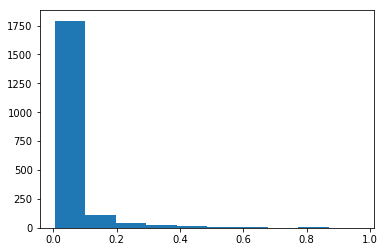

In [28]:
plt.hist(counties_real_percents['% of Total Deaths'], bins=10);

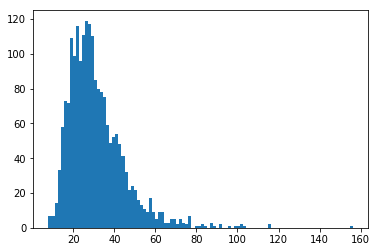

In [29]:
plt.hist(counties_data['Crude Rate'], bins=100);

In [30]:
#find the 10% of counties with the worst overdose rates 
len(counties_data[counties_data['Crude Rate']>=48])/len(counties_data)

0.0977667493796526

In [31]:
import numpy as np
counties_data.describe()

,Deaths,Population,Crude Rate,% of Total Deaths,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,%_college_3+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
count,2015.000000,2.015000e+03,2015.000000,2015.000000,2.015000e+03,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,...,2015.000000,2015.000000,2015.000000,2015.000000,2.015000e+03,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,221.504218,7.697052e+05,31.182003,0.048531,3.934429e+04,5.909628,5.365856,43.201241,22.344268,23.178759,...,14.497519,8.366352,86.622878,22.862829,5.689684e+04,83.134839,72.260943,30.905211,97.572208,31002.783127
std,519.332693,2.003106e+06,13.944111,0.113782,1.059416e+05,1.509989,1.347735,6.256521,3.620372,10.096346,...,5.816358,4.557504,5.749122,9.954506,1.397341e+05,6.709357,8.962677,15.327295,106.438226,15344.335467
min,20.000000,2.092900e+04,7.899600,0.004400,1.199000e+03,1.400000,1.100000,13.200000,5.900000,3.700000,...,2.800000,1.900000,58.200000,4.900000,1.114000e+03,49.800000,38.600000,1.000000,1.000000,1001.000000
25%,36.000000,1.354240e+05,21.744650,0.007900,5.998000e+03,4.900000,4.600000,40.700000,20.800000,16.900000,...,10.100000,5.300000,83.400000,15.500000,1.041150e+04,79.400000,66.800000,18.000000,31.000000,18132.000000
50%,70.000000,2.421540e+05,28.348700,0.015300,1.144500e+04,5.900000,5.300000,44.000000,22.700000,20.700000,...,13.200000,7.000000,87.700000,20.200000,1.853700e+04,83.800000,72.900000,30.000000,73.000000,30111.000000
75%,180.500000,6.167530e+05,37.341300,0.039550,3.134150e+04,6.800000,6.100000,47.100000,24.600000,26.400000,...,17.900000,10.300000,90.800000,28.150000,4.621400e+04,87.850000,78.600000,45.000000,125.000000,45052.000000
max,10349.000000,5.060549e+07,156.161100,2.267400,2.704769e+06,13.900000,11.800000,67.800000,37.900000,76.400000,...,39.000000,40.300000,98.000000,74.100000,3.295198e+06,97.800000,94.600000,56.000000,840.000000,56041.000000


In [32]:
#label our data as high risk 0 or not high risk 1  
counties_data.loc[(counties_data['Crude Rate'] < 48), 'high_risk'] = 0
counties_data.loc[(counties_data['Crude Rate'] >= 48), 'high_risk'] = 1

In [33]:
counties_data.head().T

,0,1,2,3,4
County,"Autauga County, AL","Baldwin County, AL","Bibb County, AL","Blount County, AL","Calhoun County, AL"
Deaths,47,253,27,88,132
Population,276908,1020551,112912,288981,577611
Crude Rate,16.9731,24.7905,23.9124,30.4518,22.8528
% of Total Deaths,0.0103,0.0554,0.0059,0.0193,0.0289
%_inschool_3+,13438,44265,4626,12428,27798
%_preschool_3+,3.9,6.2,3,3.9,6.2
%_kinderg_3+,7.1,4.9,4.9,4.4,5.3
%_elementary_3+,46.3,46.5,44,49.3,41.4
%_highschool_3+,24.8,24.3,28.7,25.9,20.6


# Modeling
## Split our data into training and test sets 

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [35]:
X = counties_data.drop(columns=['high_risk','county_code','state','county',
                                'County','Deaths','Population','Crude Rate','% of Total Deaths' 
                                ])
y = counties_data['high_risk']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

## Creating a Logistic Regression 

In [37]:
#import necessary libraries 
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score, log_loss
from sklearn.decomposition import PCA
from sklearn_pandas.pipeline import Pipeline as Pipe
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [38]:
#create a pipeline that scales and creates a logistic regression object 
pipe = Pipe(steps=[
    ('scaler' , StandardScaler()),
    ('logreg' , LogisticRegression(penalty= 'l1', fit_intercept = True, solver='liblinear'))
])

In [39]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [40]:
y_hat_train_probs = pipe.predict_proba(X_train)
y_hat_test_probs = pipe.predict_proba(X_test)
y_hat_train_probs #our predicted probabilities for 0,1 respectively

array([[0.81330611, 0.18669389],
       [0.99537858, 0.00462142],
       [0.98702966, 0.01297034],
       ...,
       [0.98739446, 0.01260554],
       [0.94703558, 0.05296442],
       [0.96534588, 0.03465412]])

In [41]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
y_hat_test_1_probs = pipe.predict_proba(X_test)[:,1]#only take probability for 1
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test_1_probs)
y_hat_train_1_probs = pipe.predict_proba(X_train)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_hat_train_1_probs)
print(f"Train ROC/AUC Score: {roc_auc_score(y_train, y_hat_train_1_probs)}") 
print(f"Test ROC/AUC Score: {roc_auc_score(y_test, y_hat_test_1_probs)}")

Train ROC/AUC Score: 0.7695140424494628
Test ROC/AUC Score: 0.724640743871513


AUC: 0.724640743871513


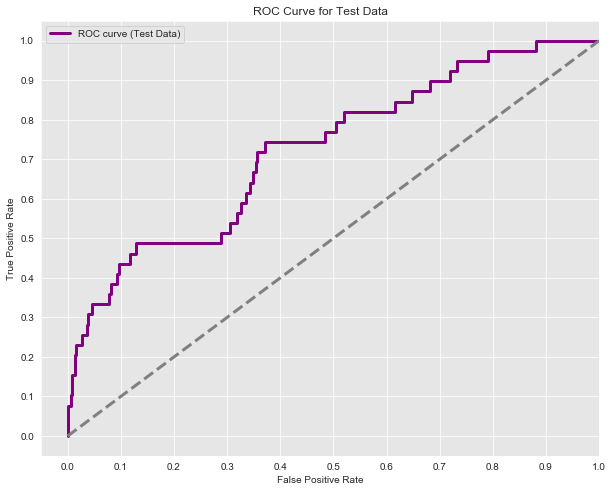

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#set seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#set figure size
plt.figure(figsize=(10,8))
lw = 3 #linewidth
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='ROC curve (Test Data)') #plot the fpr and tpr 
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--') #plot the 50% rating 
plt.xlim([-0.05, 1.0]) #set plot domain
plt.ylim([-0.05, 1.05])#set plot range 
plt.yticks([i/10.0 for i in range(11)]) 
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Test Data")
plt.legend(loc="upper left")
print('AUC: {}'.format(roc_auc_score(y_test, y_hat_test_1_probs)))
plt.show()

In [43]:
print(f"ROC/AUC score:{roc_auc_score(y_test, y_hat_test_1_probs)}")
print(f"Log Loss:{log_loss(y_test, y_hat_test_1_probs)}")
print(f"Accuracy score:{accuracy_score(y_test, y_hat_test_1_probs>=.5)}")
print(f"Precision score:{precision_score(y_test, y_hat_test_1_probs>=.5)}")
print(f"Recall score:{recall_score(y_test, y_hat_test_1_probs>=.5)}")
print(f"f1 score:{f1_score(y_test, y_hat_test_1_probs>=.5)}")
#perform cross-validation
pipe_cv_score = cross_val_score(pipe, X_test, y_test, cv=5, scoring='roc_auc')
mean_pipe_cv_score = pipe_cv_score.mean()
print("Mean Cross Validation ROC/AUC Score: {:.4}%".format(mean_pipe_cv_score * 100))

ROC/AUC score:0.724640743871513
Log Loss:0.27948248357708216
Accuracy score:0.9081885856079405
Precision score:0.6666666666666666
Recall score:0.10256410256410256
f1 score:0.17777777777777778
Mean Cross Validation ROC/AUC Score: 67.19%


For our business case, we want our recall to be quite high (alerting counties when there is even a small chance they could be at high risk), and right now we are only capturing 5% of the actual high-risk counties! 

We can do better than that. 

## Engineering the state feature with one hot encoding


In [44]:
from sklearn.preprocessing import OneHotEncoder
counties_data['state'].value_counts()

48    123
13     92
21     90
37     89
51     88
39     84
47     80
18     77
26     71
17     64
55     64
42     63
29     63
36     60
12     60
40     56
6      55
27     47
1      42
22     41
54     41
28     41
5      39
45     39
53     36
8      35
41     30
20     29
19     28
35     25
24     24
16     21
34     21
30     20
49     18
23     16
4      14
31     14
56     13
46     13
38     13
25     13
50     12
32     10
33     10
2      10
9       8
44      5
15      4
10      3
11      1
Name: state, dtype: int64

In [45]:
state_cols = counties_data["state"].values.reshape(-1, 1)
state_cols[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [46]:
encoder = OneHotEncoder().fit(state_cols)

/Users/tjjj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [47]:
encoder.get_feature_names(["state_cols"])

array(['state_cols_1.0', 'state_cols_2.0', 'state_cols_4.0',
       'state_cols_5.0', 'state_cols_6.0', 'state_cols_8.0',
       'state_cols_9.0', 'state_cols_10.0', 'state_cols_11.0',
       'state_cols_12.0', 'state_cols_13.0', 'state_cols_15.0',
       'state_cols_16.0', 'state_cols_17.0', 'state_cols_18.0',
       'state_cols_19.0', 'state_cols_20.0', 'state_cols_21.0',
       'state_cols_22.0', 'state_cols_23.0', 'state_cols_24.0',
       'state_cols_25.0', 'state_cols_26.0', 'state_cols_27.0',
       'state_cols_28.0', 'state_cols_29.0', 'state_cols_30.0',
       'state_cols_31.0', 'state_cols_32.0', 'state_cols_33.0',
       'state_cols_34.0', 'state_cols_35.0', 'state_cols_36.0',
       'state_cols_37.0', 'state_cols_38.0', 'state_cols_39.0',
       'state_cols_40.0', 'state_cols_41.0', 'state_cols_42.0',
       'state_cols_44.0', 'state_cols_45.0', 'state_cols_46.0',
       'state_cols_47.0', 'state_cols_48.0', 'state_cols_49.0',
       'state_cols_50.0', 'state_cols_51.0', 's

In [48]:
ohe = pd.DataFrame(encoder.transform(state_cols).toarray(),
                   columns=encoder.get_feature_names(["state_cols"]))

In [49]:
counties_encoded = pd.concat([counties_data.drop(['state'], axis=1), ohe], axis=1)

In [50]:
counties_encoded.drop(['state_cols_56.0'], axis=1, inplace=True)
counties_encoded.head().T

,0,1,2,3,4
County,"Autauga County, AL","Baldwin County, AL","Bibb County, AL","Blount County, AL","Calhoun County, AL"
Deaths,47,253,27,88,132
Population,276908,1020551,112912,288981,577611
Crude Rate,16.9731,24.7905,23.9124,30.4518,22.8528
% of Total Deaths,0.0103,0.0554,0.0059,0.0193,0.0289
%_inschool_3+,13438,44265,4626,12428,27798
%_preschool_3+,3.9,6.2,3,3.9,6.2
%_kinderg_3+,7.1,4.9,4.9,4.4,5.3
%_elementary_3+,46.3,46.5,44,49.3,41.4
%_highschool_3+,24.8,24.3,28.7,25.9,20.6


## Split our encoded data 

In [51]:
Xe = counties_encoded.drop(columns=['high_risk','county_code','county',
                                'County','Deaths','Population','Crude Rate','% of Total Deaths' 
                                ])
ye = counties_encoded['high_risk']

In [52]:
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe,ye, test_size=.2, random_state=0)

## Modeling encoded data with Logistic Regression

In [53]:
pipe2 = Pipe(steps=[
    ('scaler' , StandardScaler()),
    ('logreg' , LogisticRegression(penalty= 'l1', fit_intercept = True, solver='liblinear'))
])

In [54]:
pipe2.fit(Xe_train, ye_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [55]:
ye_hat_train_probs = pipe2.predict_proba(Xe_train)
ye_hat_test_probs = pipe2.predict_proba(Xe_test)
ye_hat_train_probs #our probabilities for the encoded data 

array([[2.49968496e-02, 9.75003150e-01],
       [4.36685902e-01, 5.63314098e-01],
       [9.76026255e-01, 2.39737446e-02],
       ...,
       [9.98946344e-01, 1.05365565e-03],
       [9.99200559e-01, 7.99440707e-04],
       [9.73860967e-01, 2.61390331e-02]])

In [56]:
ye_hat_test_1_probs = pipe2.predict_proba(Xe_test)[:,1] #only our 1 probabilities
fpre, tpre, thresholdse = roc_curve(ye_test, ye_hat_test_1_probs)

print(f"ROC/AUC score:{roc_auc_score(ye_test, ye_hat_test_1_probs)}")
print(f"Log Loss:{log_loss(ye_test, ye_hat_test_1_probs)}")
print(f"Accuracy score:{accuracy_score(ye_test, ye_hat_test_1_probs>=.5)}")
print(f"Precision score:{precision_score(ye_test, ye_hat_test_1_probs>=.5)}")
print(f"Recall score:{recall_score(ye_test, ye_hat_test_1_probs>=.5)}")
print(f"f1 score:{f1_score(ye_test, ye_hat_test_1_probs>=.5)}")
#perform cross-validation
pipe2_cv_score = cross_val_score(pipe2, Xe_test, ye_test, cv=5, scoring='roc_auc')
mean_pipe2_cv_score = pipe2_cv_score.mean()
print("Mean Cross Validation ROC/AUC Score: {:.4}%".format(mean_pipe2_cv_score * 100))

ROC/AUC score:0.8804460197902821
Log Loss:0.20918202637469294
Accuracy score:0.913151364764268
Precision score:0.5714285714285714
Recall score:0.21621621621621623
f1 score:0.3137254901960784
Mean Cross Validation ROC/AUC Score: 84.09%


AUC: 0.8804460197902821


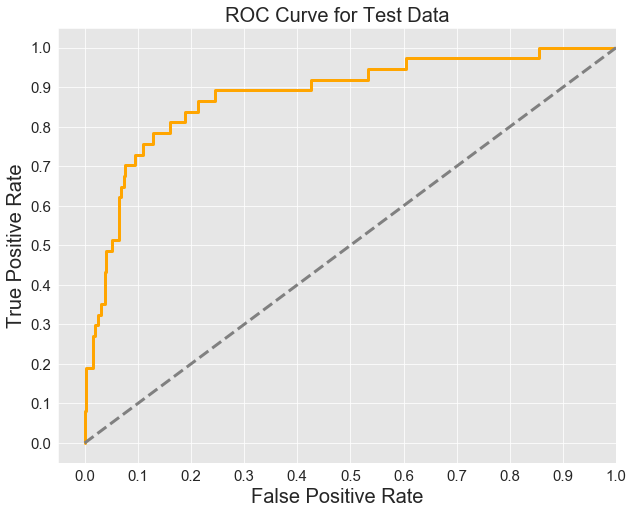

In [57]:
#set seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#set figure size
plt.figure(figsize=(10,8))
lw = 3 #linewidth
plt.plot(fpre, tpre, color='orange',
         lw=lw, label='ROC curve (Test Data)') #plot the fpr and tpr 
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--') #plot the 50% rating 
plt.xlim([-0.05, 1.0]) #set plot domain
plt.ylim([-0.05, 1.05])#set plot range 
plt.yticks([i/10.0 for i in range(11)], fontsize=15) 
plt.xticks([i/10.0 for i in range(11)], fontsize=15)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title("ROC Curve for Test Data", fontsize=20)
print('AUC: {}'.format(roc_auc_score(ye_test, ye_hat_test_1_probs)))
plt.show()

## Modeling Using Random Forest

In [58]:
#make a model with a random forest classifier to compare with logistic regression
from sklearn.ensemble import RandomForestClassifier
import sklearn

In [59]:
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=7)

In [60]:
rf.fit(Xe_train,ye_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [61]:
yerf_hat_test_probs = rf.predict_proba(Xe_test)
yerf_hat_train_probs = rf.predict_proba(Xe_train)

In [62]:
yerf_hat_test_1_probs = yerf_hat_test_probs[:,1]
fprerf, tprerf, thresholdserf = roc_curve(ye_test, yerf_hat_test_1_probs)

yerf_hat_train_1_probs = yerf_hat_train_probs[:,1]

print(f"ROC/AUC score:{roc_auc_score(ye_test, yerf_hat_test_1_probs)}")
print(f"Log Loss:{log_loss(ye_test, yerf_hat_test_1_probs)}")
print(f"Accuracy score:{accuracy_score(ye_test, yerf_hat_test_1_probs>=.5)}")
print(f"Precision score:{precision_score(ye_test, yerf_hat_test_1_probs>=.5)}")
print(f"Recall score:{recall_score(ye_test, yerf_hat_test_1_probs>=.5)}")
print(f"f1 score:{f1_score(ye_test, yerf_hat_test_1_probs>=.5)}")
#perform cross-validation
rf_cv_score = cross_val_score(rf, Xe_test, ye_test, cv=5, scoring='roc_auc')
mean_rf_cv_score = rf_cv_score.mean()
print("Mean Cross Validation ROC/AUC Score: {:.4}%".format(mean_rf_cv_score * 100))

ROC/AUC score:0.8609880372175454
Log Loss:0.2938222277302215
Accuracy score:0.9230769230769231
Precision score:0.75
Recall score:0.24324324324324326
f1 score:0.3673469387755103
Mean Cross Validation ROC/AUC Score: 79.46%


AUC:0.8609880372175454
This model does not have a better AUC than our logistic regression model, but this is the ROC curve.


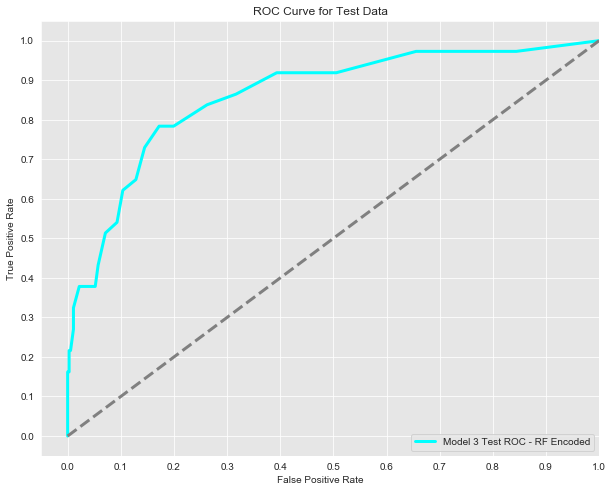

In [63]:
#graph this model's ROC curve 
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,8))
lw = 3
plt.plot(fprerf, tprerf, color='cyan',
         lw=lw, label='Model 3 Test ROC - RF Encoded')
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')  
plt.xlim([-0.05, 1.0]) 
plt.ylim([-0.05, 1.05])
plt.yticks([i/10.0 for i in range(11)]) 
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Test Data")
plt.legend(loc="lower right")
print(f"AUC:{roc_auc_score(ye_test, yerf_hat_test_1_probs)}")
print('This model does not have a better AUC than our logistic regression model, but this is the ROC curve.')
plt.show();

## Modeling by GridSearching a Random Forest

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
rf_param_grid = {'criterion':['gini','entropy'],
                 'max_depth': [4, 5, 6, 10],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [66]:
rf_grid_search = GridSearchCV(rf, param_grid=rf_param_grid, cv=5, scoring='roc_auc')

In [67]:
rf_grid_search.fit(Xe_train, ye_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=7, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [68]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [69]:
rf_grid_optimal = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=7, criterion='entropy',
                                        max_depth=10, min_samples_leaf=6, min_samples_split=2)

In [70]:
rf_grid_optimal.fit(Xe_train,ye_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [71]:
yerfgo_hat_test_probs = rf_grid_optimal.predict_proba(Xe_test)
yerfgo_hat_train_probs = rf_grid_optimal.predict_proba(Xe_train)


In [73]:
yerfgo_hat_test_1_probs = yerfgo_hat_test_probs[:,1]
fprerfgo, tprerfgo, thresholdserfgo = roc_curve(ye_test, yerfgo_hat_test_1_probs)

yerfgo_hat_train_1_probs = yerfgo_hat_train_probs[:,1]

print(f"ROC/AUC score:{roc_auc_score(ye_test, yerfgo_hat_test_1_probs)}")
print(f"Log Loss:{log_loss(ye_test, yerfgo_hat_test_1_probs)}")
print(f"Accuracy score:{accuracy_score(ye_test, yerfgo_hat_test_1_probs>=.5)}")
print(f"Precision score:{precision_score(ye_test, yerfgo_hat_test_1_probs>=.5)}")
print(f"Recall score:{recall_score(ye_test, yerfgo_hat_test_1_probs>=.5)}")
print(f"f1 score:{f1_score(ye_test, yerfgo_hat_test_1_probs>=.5)}")
#perform cross-validation
rfgo_cv_score = cross_val_score(rf_grid_optimal, Xe_test, ye_test, cv=5, scoring='roc_auc')
mean_rfgo_cv_score = rfgo_cv_score.mean()
print("Mean Cross Validation ROC/AUC Score: {:.4}%".format(mean_rfgo_cv_score * 100))

ROC/AUC score:0.8794121990843302
Log Loss:0.21997776771307348
Accuracy score:0.9255583126550868
Precision score:1.0
Recall score:0.1891891891891892
f1 score:0.3181818181818182
Mean Cross Validation ROC/AUC Score: 74.24%


# Model Evaluation
Our logistic regression model with encoded states as features is our "best" model, and the one that we will focus on "deploying" moving forward. 
First we look at the decision boundary (our "cutoff" for when we classify something as high-risk). Then we look at the features' influence on our equation (the coefficients). 

## Choosing the decision boundary

In [74]:
print(f"ROC/AUC score:{roc_auc_score(ye_test, ye_hat_test_1_probs)}")
print(f"Log Loss:{log_loss(ye_test, ye_hat_test_1_probs)}")
print(f"Accuracy score:{accuracy_score(ye_test, ye_hat_test_1_probs>=.5)}")
print(f"Precision score:{precision_score(ye_test, ye_hat_test_1_probs>=.5)}")
print(f"Recall score:{recall_score(ye_test, ye_hat_test_1_probs>=.5)}")
print(f"f1 score:{f1_score(ye_test, ye_hat_test_1_probs>=.5)}")

pipe2_cv_score = cross_val_score(pipe2, Xe_test, ye_test, cv=5, scoring='roc_auc')
mean_pipe2_cv_score = pipe2_cv_score.mean()
print("Mean Cross Validation ROC/AUC Score: {:.4}%".format(mean_pipe2_cv_score * 100))

ROC/AUC score:0.8804460197902821
Log Loss:0.20918202637469294
Accuracy score:0.913151364764268
Precision score:0.5714285714285714
Recall score:0.21621621621621623
f1 score:0.3137254901960784
Mean Cross Validation ROC/AUC Score: 84.09%


We recommend considering the following thresholds as decision boundaries:

In [75]:
option_a=-10
option_b=-16
print(f"True positive rate (Option A):{tpre[option_a]*100}%")
print(f"False positive rate (Option A):{fpre[option_a]*100}%")
print(f"Probability decision boundary for these rates (Option A):{thresholdse[option_a]*100}%")
print(f"True positive rate (Option B):{tpre[option_b]*100}%")
print(f"False positive rate (Option B):{fpre[option_b]*100}%")
print(f"Probability decision boundary for these rates (Option B):{thresholdse[option_b]*100}%")

True positive rate (Option A):89.1891891891892%
False positive rate (Option A):24.59016393442623%
Probability decision boundary for these rates (Option A):7.1294940536711575%
True positive rate (Option B):81.08108108108108%
False positive rate (Option B):16.120218579234972%
Probability decision boundary for these rates (Option B):10.904253915133724%


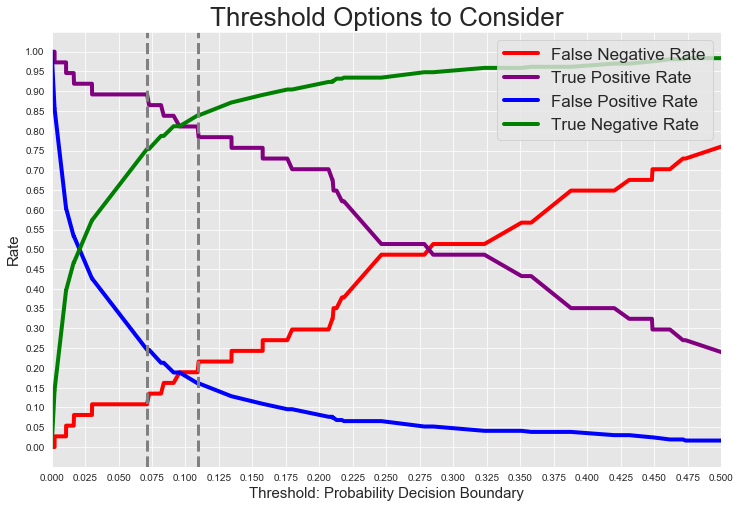

In [76]:
plt.figure(figsize=(12,8))
plt.plot(thresholdse, 1-tpre, color='red', label='False Negative Rate', lw=4)
plt.plot(thresholdse, tpre, color='purple', label='True Positive Rate', lw=4)
plt.plot(thresholdse, fpre, color='blue', label='False Positive Rate', lw=4)
plt.plot(thresholdse, 1-fpre, color='green', label='True Negative Rate', lw=4)
plt.xlabel('Threshold: Probability Decision Boundary', fontsize=15)
plt.ylabel('Rate', fontsize=15)
plt.xlim((0,.5))
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/40.0 for i in range(21)])
plt.axvline(x=thresholdse[-16], lw=3, linestyle='--', color='gray') 
plt.axvline(x=thresholdse[-10], lw=3, linestyle='--', color='gray')
plt.title('Threshold Options to Consider', fontsize=26)
plt.legend(loc='upper right', fontsize=17, fancybox=True );

## Ranking features' importance

In [77]:
#find the coefficients of our logreg
coefficients = pipe2.named_steps.logreg.coef_[0]

In [78]:
Xe.columns

Index(['%_inschool_3+', '%_preschool_3+', '%_kinderg_3+', '%_elementary_3+',
       '%_highschool_3+', '%_college_3+', '%_25+', '%_below9th_25+',
       '%_9th-12th_25+', '%_hsgrad_25+', '%_somecollege_25+',
       '%_associates_25+', '%_bachelors_b25+', '%_gradschool_25+',
       '%_hsgrad_or+_25+', '%_bachelors_or+_25+',
       '%_useinternet_total_households', '%_havecomp_total_households',
       '%_broadband_total_households', 'state_cols_1.0', 'state_cols_2.0',
       'state_cols_4.0', 'state_cols_5.0', 'state_cols_6.0', 'state_cols_8.0',
       'state_cols_9.0', 'state_cols_10.0', 'state_cols_11.0',
       'state_cols_12.0', 'state_cols_13.0', 'state_cols_15.0',
       'state_cols_16.0', 'state_cols_17.0', 'state_cols_18.0',
       'state_cols_19.0', 'state_cols_20.0', 'state_cols_21.0',
       'state_cols_22.0', 'state_cols_23.0', 'state_cols_24.0',
       'state_cols_25.0', 'state_cols_26.0', 'state_cols_27.0',
       'state_cols_28.0', 'state_cols_29.0', 'state_cols_30.0',
  

In [79]:
feature_impacts = zip(list(Xe.columns), list(coefficients))
feature_impacts = set(feature_impacts)

In [80]:
coef_df = pd.DataFrame(feature_impacts, columns=['feature', 'coefficient'])

In [81]:
ordered_df = coef_df.reindex(coef_df.coefficient.abs().sort_values(ascending=False).index)
ordered_df


,feature,coefficient
15,state_cols_48.0,-0.955605
10,state_cols_13.0,-0.917541
21,%_broadband_total_households,-0.866724
38,state_cols_28.0,-0.690907
68,state_cols_29.0,-0.609672
58,state_cols_17.0,-0.608251
55,state_cols_5.0,-0.599932
49,%_below9th_25+,-0.597003
66,state_cols_45.0,-0.590862
37,%_useinternet_total_households,0.539593


# Deployment

After the Health and Human Services Department decides on what decision thresholds suit their causes, we recommend pairing this data with a lot of other features and reports to ensure you are making well-informed decisions.  